In [1]:
#import libs

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [65]:
pp_election = catalog.load('pp_election')
pp_election
pp_election.head()

2022-06-27 21:01:39,883 - kedro.io.data_catalog - INFO - Loading data from `pp_election` (CSVDataSet)...


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,1570392602000000000,Território Nacional,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,PS,0,147993,94,106
1,1570392602000000000,Território Nacional,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,PPD/PSD,0,128624,81,77
2,1570392602000000000,Território Nacional,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,B.E.,0,26307,16,19
3,1570392602000000000,Território Nacional,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,CDS-PP,0,18923,12,5
4,1570392602000000000,Território Nacional,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,PCP-PEV,0,17757,11,12


In [66]:
pp_election.dtypes

time                     int64
territoryName           object
totalMandates            int64
numParishes              int64
numParishesApproved      int64
blankVotes               int64
nullVotes                int64
subscribedVoters         int64
totalVoters              int64
pre.blankVotes           int64
pre.nullVotes            int64
pre.subscribedVoters     int64
pre.totalVoters          int64
Party                   object
Mandates                 int64
Votes                    int64
Hondt                    int64
FinalMandates            int64
dtype: object

In [67]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [6]:
#transformando as colunas territoryName e Party que são categorias de texto em categorias de numeros 

label_encoder = label_encoder.fit(pp_election['territoryName'])

In [7]:
pp_election['territoryName'] = label_encoder.transform(pp_election['territoryName'])

In [8]:
label_encoder.inverse_transform(pp_election['territoryName'])

array(['Território Nacional', 'Território Nacional',
       'Território Nacional', ..., 'Viseu', 'Viseu', 'Viseu'],
      dtype=object)

In [9]:
#Verificando o label encoder do kedro
%reload_kedro
label_encoder2 = catalog.load('label_encoder')

2022-06-27 20:25:45,297 - root - INFO - No path argument was provided. Using: /Users/jessicaoliveira/Projects/projeto_ds_kedro/project_ds_kedro
2022-06-27 20:25:45,461 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-06-27 20:25:45,602 - root - INFO - ** Kedro project project_ds_kedro
2022-06-27 20:25:45,602 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-06-27 20:25:45,603 - kedro.io.data_catalog - INFO - Loading data from `label_encoder` (PickleDataSet)...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
#Verificando o label encoder do kedro

label_encoder2.inverse_transform(pp_election['territoryName'])

array(['Território Nacional', 'Território Nacional',
       'Território Nacional', ..., 'Viseu', 'Viseu', 'Viseu'],
      dtype=object)

In [11]:
pp_election['territoryName'][0]

16

In [12]:
label_encoder2.inverse_transform(pp_election['territoryName'])[0]

'Território Nacional'

In [13]:
pp_election

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder_party = LabelEncoder()
label_encoder_party

LabelEncoder()

In [15]:
#transformando as colunas territoryName e Party que são categorias de texto em categorias de numeros 

label_encoder_party = label_encoder_party.fit(pp_election['Party'])

In [16]:
pp_election['Party'] = label_encoder_party.transform(pp_election['Party'])

In [17]:
label_encoder_party.inverse_transform(pp_election['Party'])

array(['PS', 'PPD/PSD', 'B.E.', ..., 'MPT', 'PTP', 'JPP'], dtype=object)

In [18]:
#Verificando o label encoder do kedro
%reload_kedro
label_encoder3 = catalog.load('label_encoder_party')

2022-06-27 20:25:45,669 - root - INFO - No path argument was provided. Using: /Users/jessicaoliveira/Projects/projeto_ds_kedro/project_ds_kedro
2022-06-27 20:25:45,773 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-06-27 20:25:45,923 - root - INFO - ** Kedro project project_ds_kedro
2022-06-27 20:25:45,924 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-06-27 20:25:45,925 - kedro.io.data_catalog - INFO - Loading data from `label_encoder_party` (PickleDataSet)...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [19]:
#Verificando o label encoder do kedro

label_encoder3.inverse_transform(pp_election['Party'])

array(['PS', 'PPD/PSD', 'B.E.', ..., 'MPT', 'PTP', 'JPP'], dtype=object)

In [20]:
catalog.load('encode_territoryname_dataset')

2022-06-27 20:25:45,935 - kedro.io.data_catalog - INFO - Loading data from `encode_territoryname_dataset` (CSVDataSet)...


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [70]:
encode_party_dataset = catalog.load('encode_party_dataset')

2022-06-27 21:05:09,610 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


In [71]:
encode_party_dataset.dtypes

time                    int64
territoryName           int64
totalMandates           int64
numParishes             int64
numParishesApproved     int64
blankVotes              int64
nullVotes               int64
subscribedVoters        int64
totalVoters             int64
pre.blankVotes          int64
pre.nullVotes           int64
pre.subscribedVoters    int64
pre.totalVoters         int64
Party                   int64
Mandates                int64
Votes                   int64
Hondt                   int64
FinalMandates           int64
dtype: object

In [23]:
%reload_kedro

2022-06-27 20:25:46,098 - root - INFO - No path argument was provided. Using: /Users/jessicaoliveira/Projects/projeto_ds_kedro/project_ds_kedro
2022-06-27 20:25:46,220 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-06-27 20:25:46,360 - root - INFO - ** Kedro project project_ds_kedro
2022-06-27 20:25:46,361 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [72]:
encode_party_dataset = catalog.load('encode_party_dataset')
encode_party_dataset

2022-06-27 21:05:17,991 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,17,0,147993,94,106
1,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,15,0,128624,81,77
2,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,1,0,26307,16,19
3,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,2,0,18923,12,5
4,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,11,0,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,9,0,332,0,0
21639,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,14,0,326,0,0
21640,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,8,0,256,0,0
21641,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,18,0,239,0,0


2022-06-27 21:05:55,073 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


<AxesSubplot:>

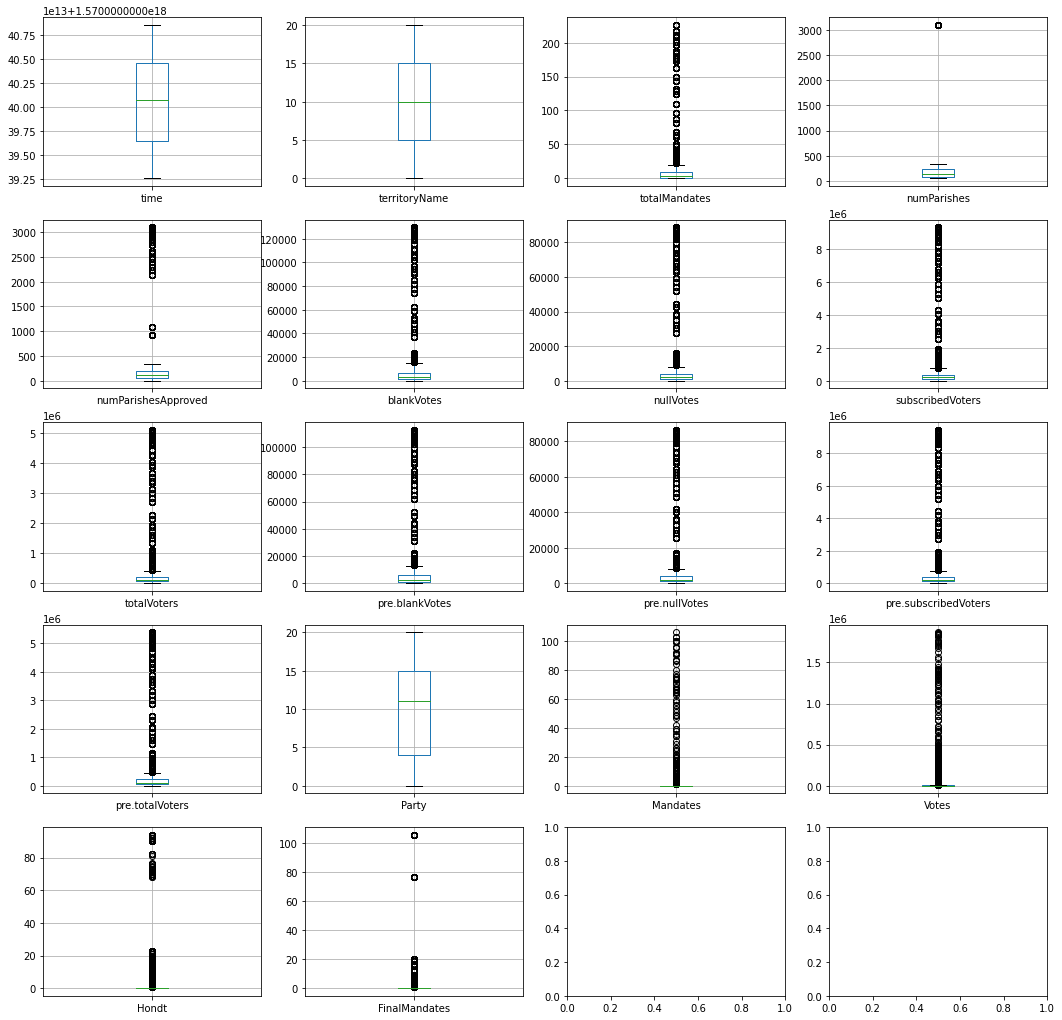

In [73]:
#Verificando outliers:
dados_election_encoded = catalog.load('encode_party_dataset')
dados_election_encoded


#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(5, 4, figsize=(18,18))

dados_election_encoded.boxplot(column=['time'], ax=axes[0,0])
dados_election_encoded.boxplot(column=['territoryName'], ax=axes[0,1])
dados_election_encoded.boxplot(column=['totalMandates'], ax=axes[0,2])
dados_election_encoded.boxplot(column=['numParishes'], ax=axes[0,3])
dados_election_encoded.boxplot(column=['numParishesApproved'], ax=axes[1,0])
dados_election_encoded.boxplot(column=['blankVotes'], ax=axes[1,1])
dados_election_encoded.boxplot(column=['nullVotes'], ax=axes[1,2])
dados_election_encoded.boxplot(column=['subscribedVoters'], ax=axes[1,3])
dados_election_encoded.boxplot(column=['totalVoters'], ax=axes[2,0])
dados_election_encoded.boxplot(column=['pre.blankVotes'], ax=axes[2,1])
dados_election_encoded.boxplot(column=['pre.nullVotes'], ax=axes[2,2])
dados_election_encoded.boxplot(column=['pre.subscribedVoters'], ax=axes[2,3])
dados_election_encoded.boxplot(column=['pre.totalVoters'], ax=axes[3,0])
dados_election_encoded.boxplot(column=['Party'], ax=axes[3,1])
dados_election_encoded.boxplot(column=['Mandates'], ax=axes[3,2])
dados_election_encoded.boxplot(column=['Votes'], ax=axes[3,3])
dados_election_encoded.boxplot(column=['Hondt'], ax=axes[4,0])
dados_election_encoded.boxplot(column=['FinalMandates'], ax=axes[4,1])

In [34]:
dados_election_encoded

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,1570392602000000000,16,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,11,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,9,0,0.19,0.20,332,0,0
21639,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,14,0,0.18,0.19,326,0,0
21640,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,8,0,0.14,0.15,256,0,0
21641,265,1570408501000000000,19,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,18,0,0.13,0.14,239,0,0


In [115]:
#Removal of Outliers
#REF: https://www.askpython.com/python/examples/detection-removal-outliers-in-python

dados_election_encoded = catalog.load('encode_party_dataset')

for x in dados_election_encoded:
    q75,q25 = np.percentile(dados_election_encoded.loc[:,x],[75,25])
    intr_qr = q75-q25
    
    
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dados_election_encoded.loc[dados_election_encoded[x] < min,x] = np.nan
    dados_election_encoded.loc[dados_election_encoded[x] > max,x] = np.nan
        
y = dados_election_encoded.dropna(axis = 0)
y


2022-06-27 23:20:42,292 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
25,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,11.0,0.0,152.0,0.0,0.0
26,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,10.0,0.0,130.0,0.0,0.0
27,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,20.0,0.0,103.0,0.0,0.0
28,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,12.0,0.0,37.0,0.0,0.0
29,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,3.0,0.0,36.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,9.0,0.0,332.0,0.0,0.0
21639,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,14.0,0.0,326.0,0.0,0.0
21640,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,8.0,0.0,256.0,0.0,0.0
21641,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,18.0,0.0,239.0,0.0,0.0


In [96]:
#funcao para remover outliers

def func_remove_outliers(df):
    """ This function detects and removes outliers using the Interquartile range(IQR) method """
    
    #Detection outliers and replace the data points that lie outside of the lower and the upper bound with a NULL value.
    for x in df:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
    
    #Drop the null values 
    df = df.dropna(axis = 0)
    
    return df

In [105]:
# Test function
df_without_outliers = func_remove_outliers(catalog.load('encode_party_dataset'))
df_without_outliers

2022-06-27 22:33:05,424 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
25,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,11.0,0.0,152.0,0.0,0.0
26,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,10.0,0.0,130.0,0.0,0.0
27,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,20.0,0.0,103.0,0.0,0.0
28,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,12.0,0.0,37.0,0.0,0.0
29,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,3.0,0.0,36.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,9.0,0.0,332.0,0.0,0.0
21639,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,14.0,0.0,326.0,0.0,0.0
21640,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,8.0,0.0,256.0,0.0,0.0
21641,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,18.0,0.0,239.0,0.0,0.0


In [92]:
dados_election_encoded.isnull().sum()
y = dados_election_encoded.dropna(axis = 0)
y
y.isnull().sum()

,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
25,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,11.0,0.0,152.0,0.0,0.0
26,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,10.0,0.0,130.0,0.0,0.0
27,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,20.0,0.0,103.0,0.0,0.0
28,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,12.0,0.0,37.0,0.0,0.0
29,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,3.0,0.0,36.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,9.0,0.0,332.0,0.0,0.0
21639,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,14.0,0.0,326.0,0.0,0.0
21640,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,8.0,0.0,256.0,0.0,0.0
21641,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,18.0,0.0,239.0,0.0,0.0


In [103]:
%reload_kedro

election_cleaned_dataset = catalog.load('election_cleaned_dataset')
election_cleaned_dataset

2022-06-27 21:33:47,118 - root - INFO - No path argument was provided. Using: /Users/jessicaoliveira/Projects/projeto_ds_kedro/project_ds_kedro
2022-06-27 21:33:47,570 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-06-27 21:33:48,221 - root - INFO - ** Kedro project project_ds_kedro
2022-06-27 21:33:48,222 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-06-27 21:33:48,223 - kedro.io.data_catalog - INFO - Loading data from `election_cleaned_dataset` (CSVDataSet)...


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,11.0,0.0,152.0,0.0,0.0
1,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,10.0,0.0,130.0,0.0,0.0
2,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,20.0,0.0,103.0,0.0,0.0
3,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,12.0,0.0,37.0,0.0,0.0
4,1.570393e+18,0.0,0.0,147.0,12.0,186.0,101.0,11953.0,6371.0,124.0,111.0,12511.0,6826.0,3.0,0.0,36.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15674,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,9.0,0.0,332.0,0.0,0.0
15675,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,14.0,0.0,326.0,0.0,0.0
15676,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,8.0,0.0,256.0,0.0,0.0
15677,1.570409e+18,19.0,8.0,277.0,277.0,4995.0,3700.0,348061.0,177647.0,4235.0,3632.0,371931.0,190712.0,18.0,0.0,239.0,0.0,0.0


array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'territoryName'}>,
        <AxesSubplot:title={'center':'totalMandates'}>,
        <AxesSubplot:title={'center':'numParishes'}>,
        <AxesSubplot:title={'center':'numParishesApproved'}>],
       [<AxesSubplot:title={'center':'blankVotes'}>,
        <AxesSubplot:title={'center':'nullVotes'}>,
        <AxesSubplot:title={'center':'subscribedVoters'}>,
        <AxesSubplot:title={'center':'totalVoters'}>,
        <AxesSubplot:title={'center':'pre.blankVotes'}>],
       [<AxesSubplot:title={'center':'pre.nullVotes'}>,
        <AxesSubplot:title={'center':'pre.subscribedVoters'}>,
        <AxesSubplot:title={'center':'pre.totalVoters'}>,
        <AxesSubplot:title={'center':'Party'}>,
        <AxesSubplot:title={'center':'Mandates'}>],
       [<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Hondt'}>,
        <AxesSubplot:title={'center':'FinalMandates'}>, <AxesSubplot:>,
   

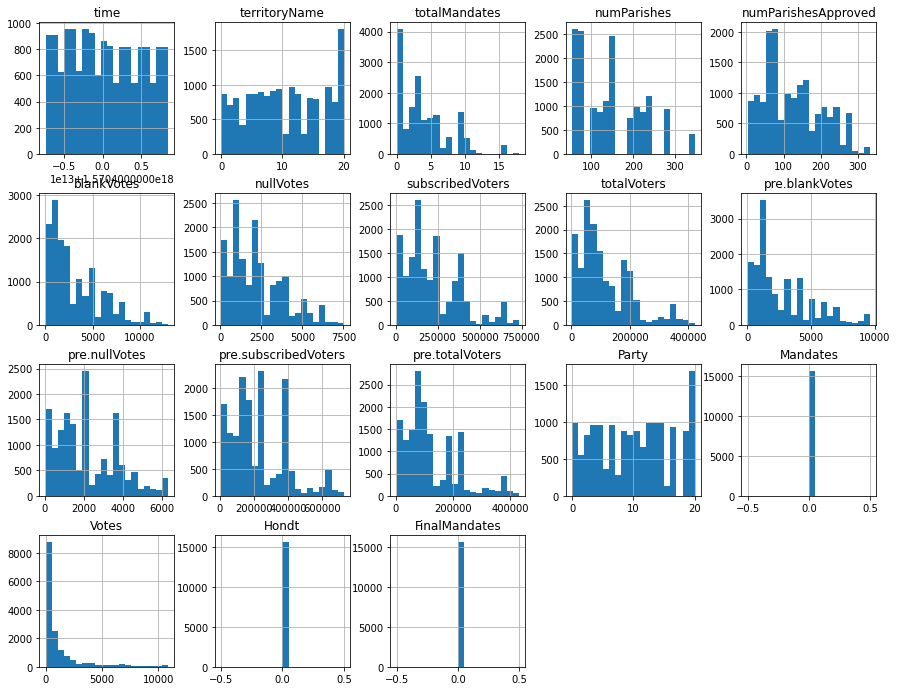

In [107]:
#Now plotting histogram for checking distribution of variables
df_without_outliers.hist(figsize=(15,15), layout=(5,5), bins=20)